In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix,accuracy_score,r2_score

### Importing Data

In [2]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [3]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
wine_quality = fetch_ucirepo(id=186) 

In [4]:
x = wine_quality.data.features
y = wine_quality.data.targets
x.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


### Creating Degrees of Features

In [5]:
poly_deg_2 = PolynomialFeatures(degree=2)
poly_deg_3 = PolynomialFeatures(degree=3)
poly_deg_4 = PolynomialFeatures(degree=4)

In [6]:
x_poly_2 = poly_deg_2.fit_transform(x)
x_poly_3 = poly_deg_3.fit_transform(x)
x_poly_4 = poly_deg_4.fit_transform(x)

### Scaling

In [7]:
sc = MinMaxScaler()
x_poly_2 = sc.fit_transform(x_poly_2)
x_poly_3 = sc.fit_transform(x_poly_3)
x_poly_4 = sc.fit_transform(x_poly_4)

### Creating Model for Degree 2

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x_poly_2,y,test_size=0.2,random_state=0)
reg2 = LinearRegression()
reg2.fit(x_train,y_train)

LinearRegression()

In [15]:
y_predict_2 = reg2.predict(x_test)
y_predict_round_2 = []
for i in range(len(y_predict_2)):
    y_predict_round_2.append(round(y_predict_2[i][0]))
y_predict_round_2 = np.array(y_predict_round_2)
y_predict_round_2 = y_predict_round_2.reshape(len(y_predict_round_2),1)
y_test = np.array(y_test)

### Creating Model for Degree 3

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x_poly_3,y,test_size=0.2,random_state=0)
reg3 = LinearRegression()
reg3.fit(x_train,y_train)

LinearRegression()

In [19]:
y_predict_3 = reg3.predict(x_test)
y_predict_round_3 = []
for i in range(len(y_predict_3)):
    y_predict_round_3.append(round(y_predict_3[i][0]))
y_predict_round_3 = np.array(y_predict_round_3)
y_predict_round_3 = y_predict_round_3.reshape(len(y_predict_round_3),1)
y_test = np.array(y_test)

### Creating Model for Degree 4

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x_poly_4,y,test_size=0.2,random_state=0)
reg4 = LinearRegression()
reg4.fit(x_train,y_train)

LinearRegression()

In [21]:
y_predict_4 = reg4.predict(x_test)
y_predict_round_4 = []
for i in range(len(y_predict_4)):
    y_predict_round_4.append(round(y_predict_4[i][0]))
y_predict_round_4 = np.array(y_predict_round_4)
y_predict_round_4 = y_predict_round_4.reshape(len(y_predict_round_4),1)
y_test = np.array(y_test)

### Accuracy Scores

In [22]:
accuracy_score(y_predict_round_2,y_test)

0.53

In [23]:
accuracy_score(y_predict_round_3,y_test)

0.5346153846153846

In [24]:
accuracy_score(y_predict_round_4,y_test)

0.5230769230769231

### Visualition in order 2,3,4

In [26]:
y_test_visualition = y_test[:50,:]
y_predict_visualiton_2 = y_predict_round_2[:50,:]
y_predict_visualiton_3 = y_predict_round_3[:50,:]
y_predict_visualiton_4 = y_predict_round_4[:50,:]



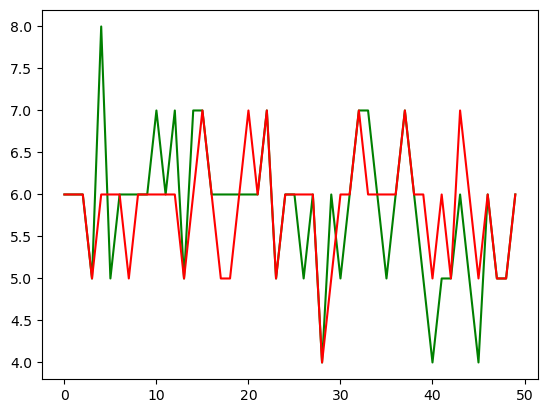

In [32]:
plt.plot(range(50),y_test_visualition, color="green")
plt.plot(range(50),y_predict_visualiton_2,color ="red")

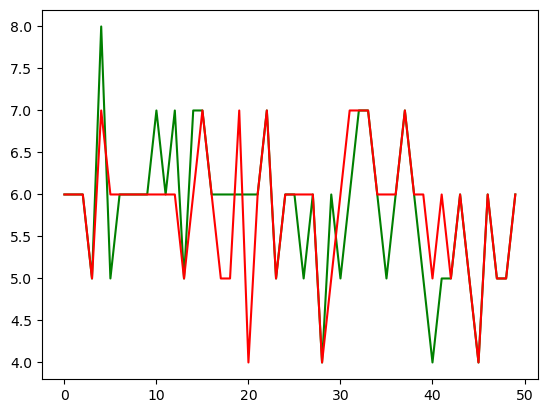

In [31]:
plt.plot(range(50),y_test_visualition,color = "g")
plt.plot(range(50),y_predict_visualiton_3,color = "r")

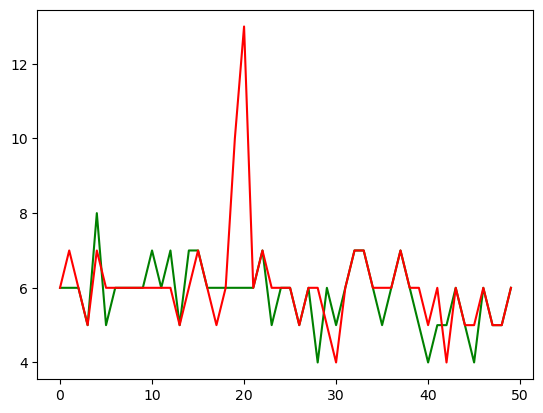

In [30]:
plt.plot(range(50),y_test_visualition,color = "g")
plt.plot(range(50),y_predict_visualiton_4, color = "r")